CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


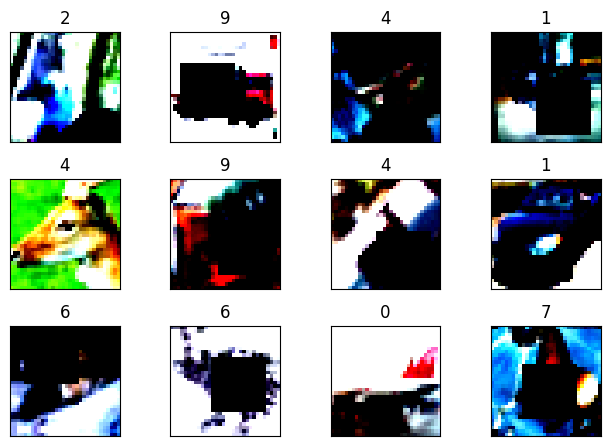

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
import matplotlib.pyplot as plt
# os['KMP_DUPLICATE_LIB_OK']='True'
# CUDA?
import numpy as np
import albumentations as A
from albumentations.pytorch import ToTensorV2

from dataset import Cifar10SearchDataset
from transforms import test_transforms, train_transforms

cuda = torch.cuda.is_available()

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("CUDA Available?", cuda)


train_data = Cifar10SearchDataset(
    root='./data/cifar10', train=True, download=True, transform=train_transforms)
test_data = Cifar10SearchDataset(
    root='./data/cifar10', train=False, download=True, transform=test_transforms)

class_map = {
    'ZERO': 0,
    'ONE': 1,
    'TWO': 2,
    'THREE': 3,
    'FOUR': 4,
    'FIVE': 5,
    'SIX': 6,
    'SEVEN': 7,
    'EIGHT': 8,
    'NINE': 9
}
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

from utils import return_dataset_images

return_dataset_images(train_loader, 12)

In [3]:
!pip install torchsummary
from model import Net, train, test, model_summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

model = Net().to(device)
model_summary(model, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 44, 32, 32]           1,188
              ReLU-2           [-1, 44, 32, 32]               0
       BatchNorm2d-3           [-1, 44, 32, 32]              88
           Dropout-4           [-1, 44, 32, 32]               0
            Conv2d-5           [-1, 44, 32, 32]          17,424
              ReLU-6           [-1, 44, 32, 32]               0
       BatchNorm2d-7           [-1, 44, 32, 32]              88
           Dropout-8           [-1, 44, 32, 32]               0
            Conv2d-9           [-1, 44, 16, 16]          17,424
             ReLU-10           [-1, 44, 16, 16]               0
      BatchNorm2d-11           [-1, 44, 16, 16]              88
          Dropout-12           [-1, 44, 16, 16]               0
           Conv2d-13           [-1, 44, 16, 16]          17,424
             ReLU-14           [-1, 44,

In [4]:

optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=18, gamma=0.1, verbose=True)
# New Line
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor=0.1, patience=7)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.2, epochs=20, steps_per_epoch=len(train_loader)*100)
criterion = nn.CrossEntropyLoss()
num_epochs = 60

for epoch in range(1, num_epochs+1):
  # print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion,scheduler)
  test(model, device, test_loader)
  # scheduler.step()

Loss=1.702235460281372 Batch_id=97 Accuracy=26.90: 100%|██████████| 98/98 [00:13<00:00,  7.10it/s]



Test set: Average loss: 1.6424, Accuracy: 3959/10000 (39.59%)



Loss=1.520948052406311 Batch_id=97 Accuracy=42.15: 100%|██████████| 98/98 [00:10<00:00,  9.35it/s]



Test set: Average loss: 1.3505, Accuracy: 5024/10000 (50.24%)



Loss=1.3608347177505493 Batch_id=97 Accuracy=47.89: 100%|██████████| 98/98 [00:09<00:00,  9.95it/s]



Test set: Average loss: 1.2580, Accuracy: 5473/10000 (54.73%)



Loss=1.2695268392562866 Batch_id=97 Accuracy=52.18: 100%|██████████| 98/98 [00:09<00:00, 10.00it/s]



Test set: Average loss: 1.1457, Accuracy: 5923/10000 (59.23%)



Loss=1.2755126953125 Batch_id=97 Accuracy=54.93: 100%|██████████| 98/98 [00:09<00:00, 10.70it/s]



Test set: Average loss: 1.0292, Accuracy: 6379/10000 (63.79%)



Loss=1.1090158224105835 Batch_id=97 Accuracy=57.58: 100%|██████████| 98/98 [00:08<00:00, 11.10it/s]



Test set: Average loss: 0.9544, Accuracy: 6586/10000 (65.86%)



Loss=1.079567790031433 Batch_id=97 Accuracy=60.12: 100%|██████████| 98/98 [00:10<00:00,  9.63it/s]



Test set: Average loss: 0.8966, Accuracy: 6849/10000 (68.49%)



Loss=1.0748389959335327 Batch_id=97 Accuracy=61.83: 100%|██████████| 98/98 [00:10<00:00,  9.76it/s]



Test set: Average loss: 0.8448, Accuracy: 7024/10000 (70.24%)



Loss=0.9315438270568848 Batch_id=97 Accuracy=63.41: 100%|██████████| 98/98 [00:09<00:00,  9.97it/s]



Test set: Average loss: 0.8407, Accuracy: 7000/10000 (70.00%)



Loss=0.9250813722610474 Batch_id=97 Accuracy=64.22: 100%|██████████| 98/98 [00:10<00:00,  9.63it/s]



Test set: Average loss: 0.7758, Accuracy: 7293/10000 (72.93%)



Loss=1.1007541418075562 Batch_id=97 Accuracy=66.18: 100%|██████████| 98/98 [00:08<00:00, 11.16it/s]



Test set: Average loss: 0.7590, Accuracy: 7379/10000 (73.79%)



Loss=0.9066411256790161 Batch_id=97 Accuracy=66.71: 100%|██████████| 98/98 [00:09<00:00, 10.55it/s]



Test set: Average loss: 0.7229, Accuracy: 7485/10000 (74.85%)



Loss=0.8491488695144653 Batch_id=97 Accuracy=67.64: 100%|██████████| 98/98 [00:09<00:00,  9.83it/s]



Test set: Average loss: 0.6884, Accuracy: 7587/10000 (75.87%)



Loss=0.8876181244850159 Batch_id=97 Accuracy=68.47: 100%|██████████| 98/98 [00:10<00:00,  9.77it/s]



Test set: Average loss: 0.6792, Accuracy: 7686/10000 (76.86%)



Loss=0.8780876994132996 Batch_id=97 Accuracy=69.14: 100%|██████████| 98/98 [00:09<00:00,  9.98it/s]



Test set: Average loss: 0.6833, Accuracy: 7686/10000 (76.86%)



Loss=0.8054379820823669 Batch_id=97 Accuracy=69.74: 100%|██████████| 98/98 [00:09<00:00, 10.73it/s]



Test set: Average loss: 0.6569, Accuracy: 7760/10000 (77.60%)



Loss=0.8682684898376465 Batch_id=97 Accuracy=70.47: 100%|██████████| 98/98 [00:09<00:00, 10.20it/s]



Test set: Average loss: 0.6962, Accuracy: 7615/10000 (76.15%)



Loss=0.9234750866889954 Batch_id=97 Accuracy=70.68: 100%|██████████| 98/98 [00:09<00:00,  9.92it/s]



Test set: Average loss: 0.6286, Accuracy: 7852/10000 (78.52%)



Loss=0.757191002368927 Batch_id=97 Accuracy=71.51: 100%|██████████| 98/98 [00:10<00:00,  9.75it/s]



Test set: Average loss: 0.6121, Accuracy: 7926/10000 (79.26%)



Loss=0.7682323455810547 Batch_id=97 Accuracy=71.70: 100%|██████████| 98/98 [00:09<00:00,  9.97it/s]



Test set: Average loss: 0.6097, Accuracy: 7893/10000 (78.93%)



Loss=0.8809877038002014 Batch_id=97 Accuracy=72.44: 100%|██████████| 98/98 [00:08<00:00, 10.92it/s]



Test set: Average loss: 0.5745, Accuracy: 8051/10000 (80.51%)



Loss=0.7237035632133484 Batch_id=97 Accuracy=72.67: 100%|██████████| 98/98 [00:09<00:00, 10.74it/s]



Test set: Average loss: 0.5850, Accuracy: 7956/10000 (79.56%)



Loss=0.8667739629745483 Batch_id=97 Accuracy=73.05: 100%|██████████| 98/98 [00:09<00:00,  9.96it/s]



Test set: Average loss: 0.5695, Accuracy: 8070/10000 (80.70%)



Loss=0.7422085404396057 Batch_id=97 Accuracy=73.52: 100%|██████████| 98/98 [00:10<00:00,  9.78it/s]



Test set: Average loss: 0.5661, Accuracy: 8088/10000 (80.88%)



Loss=0.7239928841590881 Batch_id=97 Accuracy=73.61: 100%|██████████| 98/98 [00:10<00:00,  9.72it/s]



Test set: Average loss: 0.5613, Accuracy: 8090/10000 (80.90%)



Loss=0.6667648553848267 Batch_id=97 Accuracy=74.33: 100%|██████████| 98/98 [00:09<00:00, 10.57it/s]



Test set: Average loss: 0.5352, Accuracy: 8191/10000 (81.91%)



Loss=0.7664045691490173 Batch_id=97 Accuracy=74.30: 100%|██████████| 98/98 [00:09<00:00, 10.78it/s]



Test set: Average loss: 0.5301, Accuracy: 8192/10000 (81.92%)



Loss=0.8590971827507019 Batch_id=97 Accuracy=74.73: 100%|██████████| 98/98 [00:09<00:00,  9.87it/s]



Test set: Average loss: 0.5278, Accuracy: 8208/10000 (82.08%)



Loss=0.7539445161819458 Batch_id=97 Accuracy=74.99: 100%|██████████| 98/98 [00:09<00:00, 10.03it/s]



Test set: Average loss: 0.5517, Accuracy: 8125/10000 (81.25%)



Loss=0.6490669846534729 Batch_id=97 Accuracy=75.13: 100%|██████████| 98/98 [00:10<00:00,  9.54it/s]



Test set: Average loss: 0.5170, Accuracy: 8199/10000 (81.99%)



Loss=0.6911273002624512 Batch_id=97 Accuracy=75.84: 100%|██████████| 98/98 [00:10<00:00,  9.68it/s]



Test set: Average loss: 0.5160, Accuracy: 8267/10000 (82.67%)



Loss=0.6568263173103333 Batch_id=97 Accuracy=75.82: 100%|██████████| 98/98 [00:09<00:00, 10.80it/s]



Test set: Average loss: 0.5177, Accuracy: 8259/10000 (82.59%)



Loss=0.7343431115150452 Batch_id=97 Accuracy=76.01: 100%|██████████| 98/98 [00:09<00:00, 10.70it/s]



Test set: Average loss: 0.5060, Accuracy: 8265/10000 (82.65%)



Loss=0.7686722874641418 Batch_id=97 Accuracy=76.14: 100%|██████████| 98/98 [00:09<00:00,  9.96it/s]



Test set: Average loss: 0.5096, Accuracy: 8248/10000 (82.48%)



Loss=0.6322191953659058 Batch_id=97 Accuracy=76.04: 100%|██████████| 98/98 [00:10<00:00,  9.77it/s]



Test set: Average loss: 0.4981, Accuracy: 8292/10000 (82.92%)



Loss=0.6136670708656311 Batch_id=97 Accuracy=76.27: 100%|██████████| 98/98 [00:10<00:00,  9.54it/s]



Test set: Average loss: 0.4808, Accuracy: 8369/10000 (83.69%)



Loss=0.7873831391334534 Batch_id=97 Accuracy=76.79: 100%|██████████| 98/98 [00:10<00:00,  9.77it/s]



Test set: Average loss: 0.4894, Accuracy: 8349/10000 (83.49%)



Loss=0.5636667609214783 Batch_id=97 Accuracy=76.91: 100%|██████████| 98/98 [00:08<00:00, 11.19it/s]



Test set: Average loss: 0.4773, Accuracy: 8314/10000 (83.14%)



Loss=0.6719287633895874 Batch_id=97 Accuracy=77.18: 100%|██████████| 98/98 [00:09<00:00, 10.35it/s]



Test set: Average loss: 0.4926, Accuracy: 8284/10000 (82.84%)



Loss=0.6604964137077332 Batch_id=97 Accuracy=77.06: 100%|██████████| 98/98 [00:09<00:00, 10.17it/s]



Test set: Average loss: 0.4746, Accuracy: 8386/10000 (83.86%)



Loss=0.7245658040046692 Batch_id=97 Accuracy=77.52: 100%|██████████| 98/98 [00:10<00:00,  9.78it/s]



Test set: Average loss: 0.4840, Accuracy: 8349/10000 (83.49%)



Loss=0.66170734167099 Batch_id=97 Accuracy=77.22: 100%|██████████| 98/98 [00:10<00:00,  9.50it/s]



Test set: Average loss: 0.4624, Accuracy: 8446/10000 (84.46%)



Loss=0.6959174871444702 Batch_id=97 Accuracy=77.61: 100%|██████████| 98/98 [00:09<00:00, 10.23it/s]



Test set: Average loss: 0.4840, Accuracy: 8326/10000 (83.26%)



Loss=0.670242428779602 Batch_id=97 Accuracy=77.48: 100%|██████████| 98/98 [00:09<00:00, 10.81it/s]



Test set: Average loss: 0.4550, Accuracy: 8440/10000 (84.40%)



Loss=0.6012247800827026 Batch_id=97 Accuracy=77.77: 100%|██████████| 98/98 [00:10<00:00,  9.80it/s]



Test set: Average loss: 0.4598, Accuracy: 8391/10000 (83.91%)



Loss=0.5758554339408875 Batch_id=97 Accuracy=78.01: 100%|██████████| 98/98 [00:11<00:00,  8.82it/s]



Test set: Average loss: 0.4641, Accuracy: 8396/10000 (83.96%)



Loss=0.6071155071258545 Batch_id=97 Accuracy=78.21: 100%|██████████| 98/98 [00:10<00:00,  9.57it/s]



Test set: Average loss: 0.4635, Accuracy: 8405/10000 (84.05%)



Loss=0.6244626045227051 Batch_id=97 Accuracy=78.42: 100%|██████████| 98/98 [00:10<00:00,  9.68it/s]



Test set: Average loss: 0.4526, Accuracy: 8450/10000 (84.50%)



Loss=0.5832837224006653 Batch_id=97 Accuracy=78.56: 100%|██████████| 98/98 [00:08<00:00, 10.97it/s]



Test set: Average loss: 0.4552, Accuracy: 8431/10000 (84.31%)



Loss=0.5758496522903442 Batch_id=97 Accuracy=78.47: 100%|██████████| 98/98 [00:09<00:00, 10.23it/s]



Test set: Average loss: 0.4446, Accuracy: 8493/10000 (84.93%)



Loss=0.6022971868515015 Batch_id=97 Accuracy=78.58: 100%|██████████| 98/98 [00:09<00:00,  9.88it/s]



Test set: Average loss: 0.4585, Accuracy: 8443/10000 (84.43%)



Loss=0.6661412119865417 Batch_id=97 Accuracy=78.70: 100%|██████████| 98/98 [00:10<00:00,  9.55it/s]



Test set: Average loss: 0.4380, Accuracy: 8503/10000 (85.03%)



Loss=0.6009608507156372 Batch_id=97 Accuracy=78.79: 100%|██████████| 98/98 [00:10<00:00,  9.50it/s]



Test set: Average loss: 0.4529, Accuracy: 8465/10000 (84.65%)



Loss=0.5617632865905762 Batch_id=97 Accuracy=79.06: 100%|██████████| 98/98 [00:09<00:00, 10.31it/s]



Test set: Average loss: 0.4364, Accuracy: 8531/10000 (85.31%)



Loss=0.6711227297782898 Batch_id=97 Accuracy=78.77: 100%|██████████| 98/98 [00:08<00:00, 10.99it/s]



Test set: Average loss: 0.4492, Accuracy: 8524/10000 (85.24%)



Loss=0.6411988139152527 Batch_id=97 Accuracy=79.03: 100%|██████████| 98/98 [00:09<00:00,  9.93it/s]



Test set: Average loss: 0.4348, Accuracy: 8500/10000 (85.00%)



Loss=0.5444226861000061 Batch_id=97 Accuracy=79.26: 100%|██████████| 98/98 [00:09<00:00,  9.81it/s]



Test set: Average loss: 0.4336, Accuracy: 8506/10000 (85.06%)



Loss=0.5825306177139282 Batch_id=97 Accuracy=79.18: 100%|██████████| 98/98 [00:10<00:00,  9.55it/s]



Test set: Average loss: 0.4320, Accuracy: 8553/10000 (85.53%)



Loss=0.7231511473655701 Batch_id=97 Accuracy=79.66: 100%|██████████| 98/98 [00:10<00:00,  9.71it/s]



Test set: Average loss: 0.4311, Accuracy: 8561/10000 (85.61%)



Loss=0.5464848875999451 Batch_id=97 Accuracy=79.29: 100%|██████████| 98/98 [00:11<00:00,  8.70it/s]



Test set: Average loss: 0.4364, Accuracy: 8559/10000 (85.59%)



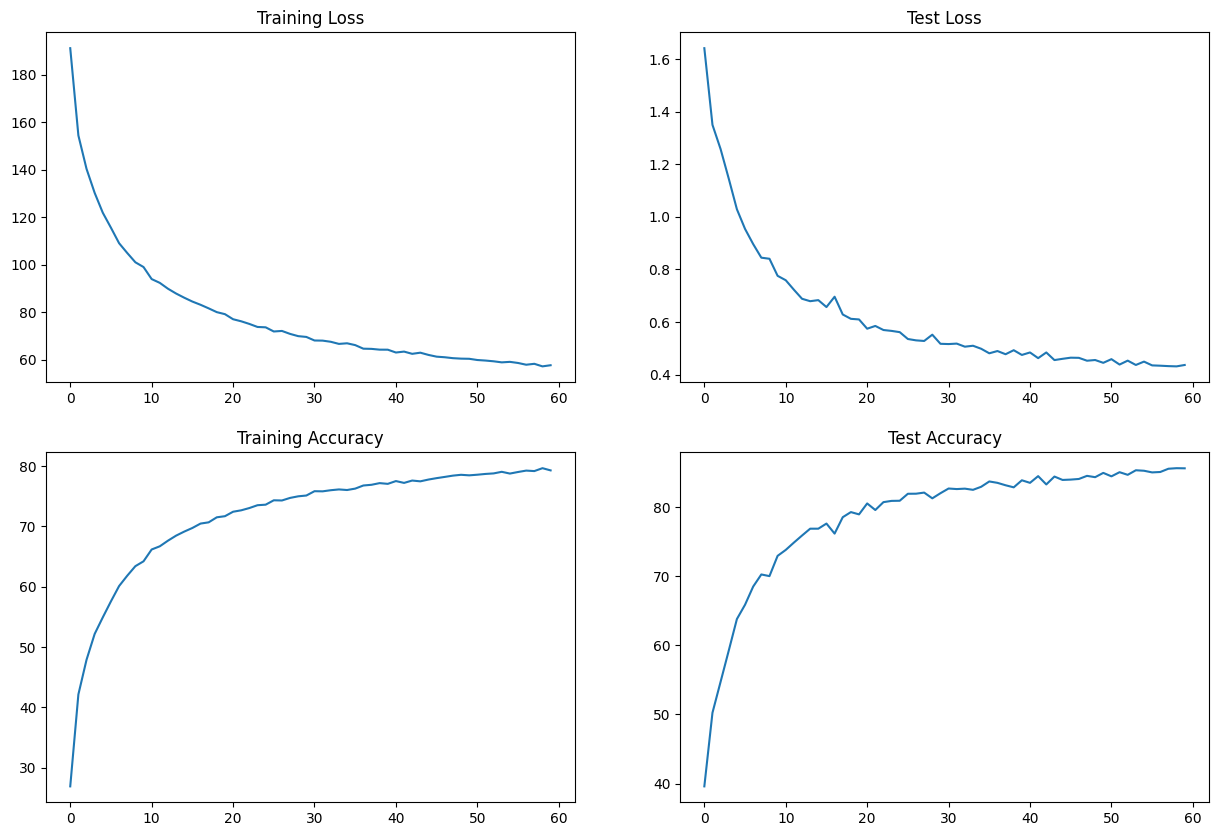

In [5]:
from model import draw_graphs
draw_graphs()

In [6]:
from utils import get_incorrrect_predictions, plot_incorrect_predictions

Total Incorrect Predictions 1441


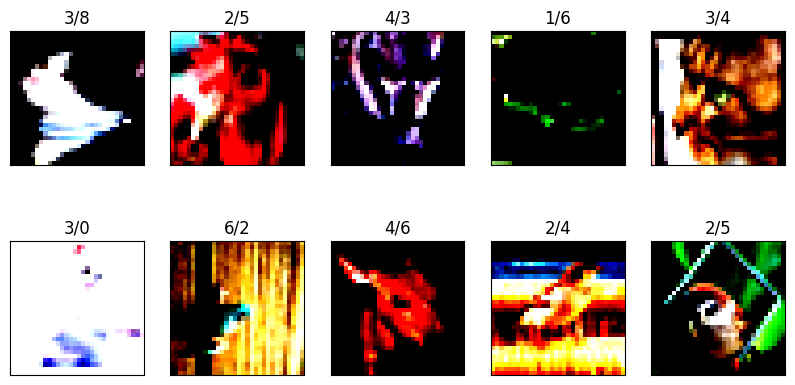

In [7]:
incorrect = get_incorrrect_predictions(model, test_loader, device)
plot_incorrect_predictions(incorrect, class_map)